# <span style="color:yellow">Escenario 1: </span> 
## Simulación de Monte Carlo de una persona sin intercambio

In [ ]:
#Algoritmo para un sujeto sin intercambio. 
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 

#Definicion variables
numero_simulaciones=10

#Definir listas y otras variables

Resultados=[]
Costo_tot_sobres=[]


for i in range(numero_simulaciones):
    estampas_totales = 670
    costo_sobre=6.75
    costo_libro=15
    sobres_comprados = 0

    album = []
    estampas_faltantes = estampas_totales - len(album)
    lista_repetidas = []
    intercambiables = len(lista_repetidas)



    def abrir_sobre(estampas_sobre=5):
        #Hace referencia a que las asignaciones de estas variables modifican las variables globales existentes (definidas fuera de la funcion)
        #Cada vez que se invoque la funcion abrir_sobre se esta modificando las variables globales
        global sobres_comprados,estampas_faltantes,intercambiables
        sobres_comprados +=1
        num_estampa= np.random.choice(np.arange(1, 671), size=estampas_sobre, replace=False)   

        for estampa in num_estampa:
            if estampa not in album:
                album.append(estampa)
            else:
                lista_repetidas.append(estampa)
        estampas_faltantes=estampas_totales-len(album)
        intercambiables = len(lista_repetidas)


    while estampas_faltantes>0:
        abrir_sobre()

    Resultados.append(sobres_comprados)
    Costo_tot_sobres.append(costo_sobre*sobres_comprados)

Sobres_prom=sum(Resultados[:])/numero_simulaciones

Costo_prom=sum(Costo_tot_sobres[:])/numero_simulaciones

Repe_prom=sum(lista_repetidas[:])/numero_simulaciones

# <span style="color:green">Resultados </span>

In [2]:
#Resultados=pd.Series(["-"])
sobres_prom_series = pd.Series([Sobres_prom])
Costo_prom_series = pd.Series([Costo_prom])
Repe_prom_series=pd.Series([Repe_prom])
df = pd.DataFrame({  "Promedio sobres": sobres_prom_series, "Costo promedio (Q)": Costo_prom_series, "Promedio repetidas": Repe_prom_series })
df
df.style.hide(axis="index").format("{:,.0f}")


Promedio sobres,Costo promedio (Q),Promedio repetidas
936,"6,318","115,420"


In [3]:
serie_sobres_simulaciones=pd.Series(Resultados)
serie_costo_simulaciones=pd.Series(Costo_tot_sobres)
data_frame_simulaciones=pd.DataFrame({"Promedio sobres":serie_sobres_simulaciones,"Costo sobres":serie_costo_simulaciones})
#data_frame_simulaciones

# <span style="color:pink">Histograma de frecuencia de sobres promedio </span>

np.float64(936.0)

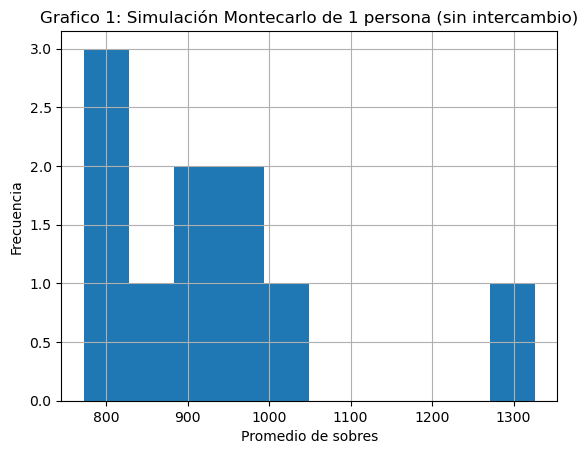

In [4]:
grafico1=data_frame_simulaciones["Promedio sobres"].hist()

grafico1.set_title("Grafico 1: Simulación Montecarlo de 1 persona (sin intercambio)")
grafico1.set_xlabel("Promedio de sobres")
grafico1.set_ylabel("Frecuencia")

data_frame_simulaciones["Promedio sobres"].mean()

# <span style="color:pink">Histograma de frecuencia de costo promedio </span>

np.float64(6318.0)

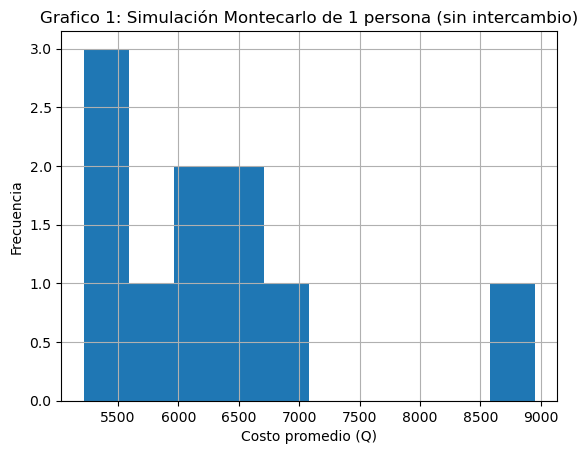

In [ ]:
grafico2=data_frame_simulaciones["Costo sobres"].hist()

grafico2.set_title("Grafico 1: Simulación Montecarlo de 1 persona (sin intercambio)")
grafico2.set_xlabel("Costo promedio (Q)")
grafico2.set_ylabel("Frecuencia")

data_frame_simulaciones["Costo sobres"].mean()

# <span style="color:yellow">Escenario 2: </span> 
## Simulación de Monte Carlo de dos personas con intercambios

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 

#Simulación de Monte Carlo 
numero_simulaciones=10
Resultados_intercambio = []
Costo_tot_intercambio = []
Repetidas_tot_intercambio = []

for simulacion in range(numero_simulaciones):

    #Variables generales
    estampas_totales = 670
    estampas_sobre=5
    costo_sobre=6.75
    costo_libro=15

    album_1 = []
    album_2 = []

    faltantes1 = list(range(1,estampas_totales+1))
    faltantes2 = list(range(1,estampas_totales+1))

    lista_repetidas_1 = []
    lista_repetidas_2 = []

    sobres_comprados_1 = 0
    sobres_comprados_2 = 0


    def abrir_sobre_1():    
        global album_1, faltantes1, lista_repetidas_1, sobres_comprados_1
        sobres_comprados_1 +=1
        num_estampa_1= np.random.choice(np.arange(1, 671), size=estampas_sobre, replace=False)
        for estampa in num_estampa_1:
            if estampa in faltantes1:
                album_1.append(estampa)
                faltantes1.remove(estampa)
            else:
                lista_repetidas_1.append(estampa)   

    def abrir_sobre_2():    
        global album_2, faltantes2, lista_repetidas_2, sobres_comprados_2
        sobres_comprados_2 +=1
        num_estampa_2= np.random.choice(np.arange(1, 671), size=estampas_sobre, replace=False)
        for estampa in num_estampa_2:
            if estampa in faltantes2:
                album_2.append(estampa)
                faltantes2.remove(estampa)
            else:
                lista_repetidas_2.append(estampa)   

    def intercambio():
        global album_1,album_2,lista_repetidas_1,lista_repetidas_2,faltantes1,faltantes2
        #Determinamos un set (conjunto) de estampas repetidas UNICAS por coleccionista
        repetidas_unicas_1=set(lista_repetidas_1)
        repetidas_unicas_2=set(lista_repetidas_2)
        
        #Determinamos las estampas disponibles de intercambio por cada uno de los coleccionistas
        #Revisando que las repetidas unicas de un coleccionista coincidan exactamente con las faltantes del otro coleccionista
        disponibles_intercambio_1=repetidas_unicas_1.intersection(set(faltantes2))
        disponibles_intercambio_2=repetidas_unicas_2.intersection(set(faltantes1))

        #Verificar que el número de intercambios sea el mismo para que sea de 1 x 1.
        if len(disponibles_intercambio_1) == len(disponibles_intercambio_2) and len(disponibles_intercambio_1)> 0:

            #Pasos para el intercambio entre 1 y 2
            #1. Transferencia de colecionista 1 a 2 
            for estampa in disponibles_intercambio_1:
                album_2.append(estampa)
            #2. Eliminación de estampa de la lista de faltantes de 2
                faltantes2.remove(estampa)
            #3. Eliminación de estampa de la lista de repetidas de 1
                lista_repetidas_1.remove(estampa)
            
            
            #1. Transferencia de colecionista 2 a 1 
            for estampa in disponibles_intercambio_2:
                album_1.append(estampa)
            #2. Eliminación de estampa de la lista de faltantes de 1
                faltantes1.remove(estampa)
            #3. Eliminación de estampa de la lista de repetidas de 2
                lista_repetidas_2.remove(estampa)

            return True
        
        else:
            return False  

    ronda=0
    while len(faltantes1)>0 or len(faltantes2)>0:
        ronda +=1

        if len(faltantes1)>0:
            abrir_sobre_1()

        if len(faltantes2)>0:
            abrir_sobre_2()

        if len(faltantes1)>0 and len(faltantes2)>0:
            intercambio()
    
    Sobres_comprados_tot = sobres_comprados_1 + sobres_comprados_2
    Sobres_promedio_sim = Sobres_comprados_tot/2
    Resultados_intercambio.append(Sobres_promedio_sim)
    
    Costo_prom_sim = Sobres_promedio_sim*costo_sobre
    Costo_tot_intercambio.append(Costo_prom_sim)

    Repetidas_totale_sim = len(lista_repetidas_1)+len(lista_repetidas_2)
    Repetidas_prom_sim = Repetidas_totale_sim/2
    Repetidas_tot_intercambio.append(Repetidas_prom_sim)

Sobres_promedio_result = sum(Resultados_intercambio[:])/numero_simulaciones

Costo_promedio_result = sum(Costo_tot_intercambio[:])/numero_simulaciones

Repetidas_promedio_result = sum(Repetidas_tot_intercambio[:])/numero_simulaciones

print(Sobres_promedio_result)
print(Costo_promedio_result)
print(Repetidas_promedio_result)



689.95
4657.1625
2779.75
